<a href="https://colab.research.google.com/github/stepka123/ready_to_start_NL/blob/main/Main_NL_part_2_by_OVR_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Запуск: Библиотек, разметка столбцов, загрузка датасетов, чистка от NAN/NULL, дроп дубликатов и классовое расспределение по labelEncoder

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import IsolationForest
from sklearn.compose import ColumnTransformer
from tensorflow.keras.metrics import Accuracy
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import LearningRateScheduler
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [101]:
# вытаскиваем тренировачный датасет и разбиваем каждую колонку на нужный нам параметр всего 43
#выделяем каждый датасет отдельно на тест и на треин
#df.head() #df.info() #df['protocol_type'].unique()
#data = df.drop('attack', axis=1)
#df.head()

columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df_train=pd.read_csv('https://raw.githubusercontent.com/stepka123/basic-NL-SA/main/KDDTrain%2B.txt',header=None,names=columns)
df_test=pd.read_csv('https://raw.githubusercontent.com/stepka123/basic-NL-SA/stepka123-KDD_Dataset/KDDTrain%2B.txt',header=None,names=columns)
df = pd.concat([df_train, df_test])
df_train.head()
#unique_values = pd.unique(df['service'])
#print(unique_values)
#count_of_ones = df['service'].value_counts()[1]
#print("Количество единиц в столбце 'service':", count_of_ones)



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [102]:
#чистим будущие данные от NaN/ Null values

def clean_dataset(df_test):
    assert isinstance(df_test, pd.DataFrame), "df_test needs to be a pd.DataFrame"
    df_test.dropna(inplace=True)
    indices_to_keep = ~df_test.isin([np.nan, np.inf, -np.inf]).any(1)
    return data_test[indices_to_keep]

def clean_dataset(df_train):
    assert isinstance(df_train, pd.DataFrame), "df_train needs to be a pd.DataFrame"
    df_train.dropna(inplace=True)
    indices_to_keep = ~df_train.isin([np.nan, np.inf, -np.inf]).any(1)
    return df_train[indices_to_keep]


In [103]:
#Дропаем дубликаты
df_dpl = df.duplicated().sum()
print("Дубликаты: ",df_dpl)
df.drop_duplicates(inplace=True)

Дубликаты:  125973


###Здесь я кодирую текстовые данные параметров методом lable Encoded параметрыы: service, flag, attack и методом Ordinal Encoder + One-hot Encoding для protocol_type

In [104]:

# Применение Label Encoding к столбцам 'service' и 'flag'
le_service = LabelEncoder().fit(df['service'])
le_flag = LabelEncoder().fit(df['flag'])
le_attack = LabelEncoder().fit(df['attack'])

df['service'] = le_service.transform(df['service'])
df['flag'] = le_flag.transform(df['flag'])
df['attack'] = le_attack.transform(df['attack'])

# Применение Ordinal Encoding к столбцу 'protocol_type' для учета порядка
ordinal_encoder = OrdinalEncoder()
ordinal_encoded = ordinal_encoder.fit_transform(df[['protocol_type']])

# Создание объекта OneHotEncoder
onehot_encoder = OneHotEncoder()

# Применение One-Hot Encoding к закодированным числовым значениям 'protocol_type'
onehot_encoded_protocol = onehot_encoder.fit_transform(ordinal_encoded).toarray()
df = df.drop('protocol_type', axis=1)
# Объединение закодированных столбцов с помощью One-Hot Encoding
encoded_df = pd.concat([df[['service', 'flag', 'attack']], pd.DataFrame(onehot_encoded_protocol)], axis=1)

# Объединение encoded_df с исходным датасетом df по оси столбцов
merged_df = pd.concat([df, encoded_df], axis=1)

# Вывод первых нескольких строк объединенного датасета
merged_df.head()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,service,flag,attack,0,1,2
0,0,20,9,491,0,0,0,0,0,0,...,0.05,0.00,11,20,20,9,11,0.0,1.0,0.0
1,0,44,9,146,0,0,0,0,0,0,...,0.00,0.00,11,15,44,9,11,0.0,0.0,1.0
2,0,49,5,0,0,0,0,0,0,0,...,0.00,0.00,9,19,49,5,9,0.0,1.0,0.0
3,0,24,9,232,8153,0,0,0,0,0,...,0.00,0.01,11,21,24,9,11,0.0,1.0,0.0
4,0,24,9,199,420,0,0,0,0,0,...,0.00,0.00,11,21,24,9,11,0.0,1.0,0.0


###Здесь кодируется методом lable Encoder все пареметры которые имеют кекстовое отображение

In [105]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()

le_protocol_type = le1.fit(df['protocol_type'])
le_service = le2.fit(df['service'])
le_flag = le3.fit(df['flag'])

le_attack = le4.fit(df['attack'])
df['protocol_type'] = le_protocol_type.transform(df['protocol_type'])
df['service'] = le_service.transform(df['service'])
df['flag'] = le_flag.transform(df['flag'])

df['attack'] = le_attack.transform(df['attack'])

KeyError: 'protocol_type'

In [ ]:
merged_df.head()

##Создается модель One-vs-Rest с использованием OneVsRestClassifier. В качестве базовой модели указывается DecisionTreeClassifier


In [106]:
y_train= merged_df[['attack']]
X_train= merged_df.drop(labels=['attack'], axis=1)

print('X_train has shape:',X_train.shape,'\ny_train has shape:',y_train.shape)

X_train has shape: (125973, 46) 
y_train has shape: (125973, 2)


In [107]:
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.05, random_state=46)

In [108]:
merged_df.head()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,service,flag,attack,0,1,2
0,0,20,9,491,0,0,0,0,0,0,...,0.05,0.00,11,20,20,9,11,0.0,1.0,0.0
1,0,44,9,146,0,0,0,0,0,0,...,0.00,0.00,11,15,44,9,11,0.0,0.0,1.0
2,0,49,5,0,0,0,0,0,0,0,...,0.00,0.00,9,19,49,5,9,0.0,1.0,0.0
3,0,24,9,232,8153,0,0,0,0,0,...,0.00,0.01,11,21,24,9,11,0.0,1.0,0.0
4,0,24,9,199,420,0,0,0,0,0,...,0.00,0.00,11,21,24,9,11,0.0,1.0,0.0


In [109]:

# Преобразование имен столбцов в строковый формат
X.columns = X.columns.astype(str)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

# Создание и обучение модели One-vs-Rest с DecisionTreeClassifier
ovr_classifier = OneVsRestClassifier(DecisionTreeClassifier())
ovr_classifier.fit(X_train, y_train)

# Оценка качества модели на тестовом наборе данных
predictions = ovr_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.9996824766818814


###Здесь графики оценки работы классификаторов


Эти графики отображают метрики оценки качества модели для каждого класса (категории) в многоклассовой классификации. В многоклассовой классификации каждый класс рассматривается отдельно, и для каждого класса вычисляются метрики качества, такие как точность (precision), полнота (recall), F1-мера (F1-score) и поддержка (support).

1. График точности (Precision) по классам: Этот график показывает точность модели для каждого класса. Точность определяется как доля верно предсказанных положительных результатов от общего числа положительных результатов, предсказанных моделью.

2. График полноты (Recall) по классам: Полнота показывает, насколько хорошо модель идентифицирует все реальные положительные случаи. Она определяется как доля верно предсказанных положительных результатов от общего числа реальных положительных результатов в данных.

3. График F1-меры (F1-score) по классам: F1-мера - это гармоническое среднее между точностью и полнотой. Она представляет собой баланс между точностью и полнотой и используется как общая мера качества модели.

4. График поддержки (Support) по классам: Поддержка - это количество фактических вхождений каждого класса в тестовом наборе данных. Этот график показывает, сколько образцов было помечено как каждый класс.

Анализируя эти графики, можно понять, как модель справляется с каждым отдельным классом и определить, есть ли какие-либо классы, для которых модель показывает плохие результаты, что может помочь в дальнейшем улучшении модели.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        14
           5       1.00      1.00      1.00       737
           6       1.00      1.00      1.00         9
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00      8362
          10       1.00      1.00      1.00       319
          11       1.00      1.00      1.00     13295
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00        41
          15       1.00      1.00      1.00       636
          16       0.00      0.00      0.00         1
          17       1.00      1.00      1.00       718
          18       1.00      1.00      1.00       554
          19       0.00    

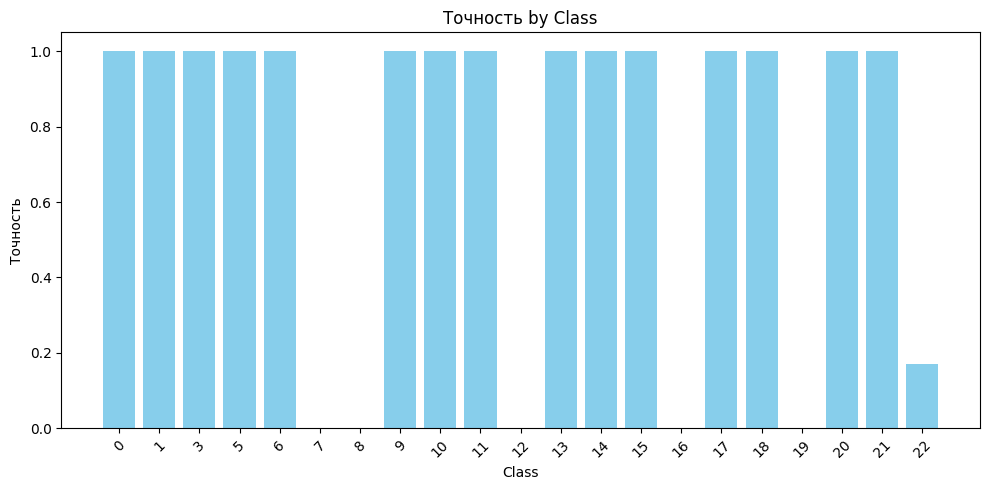

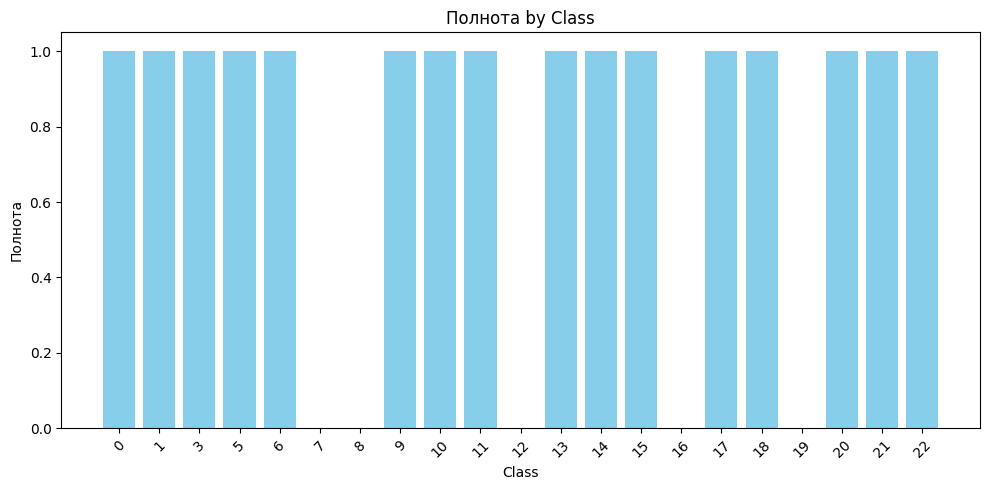

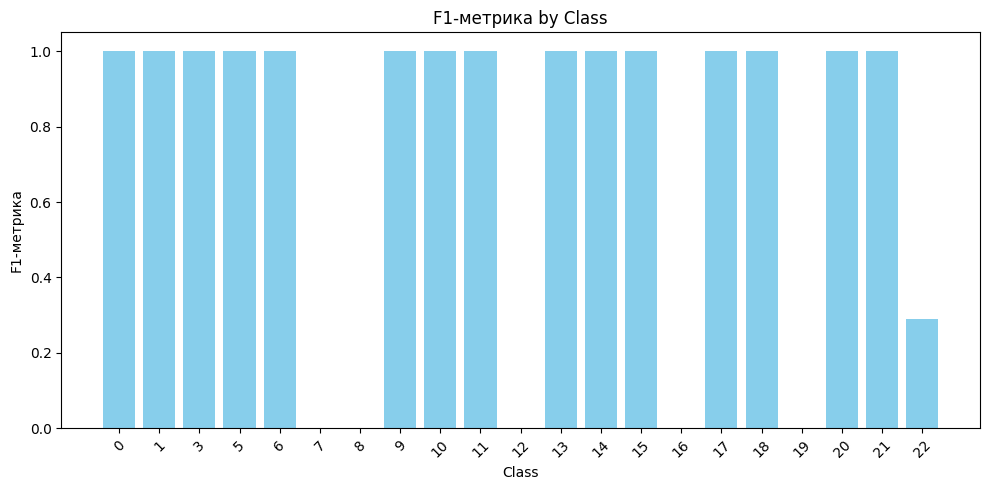

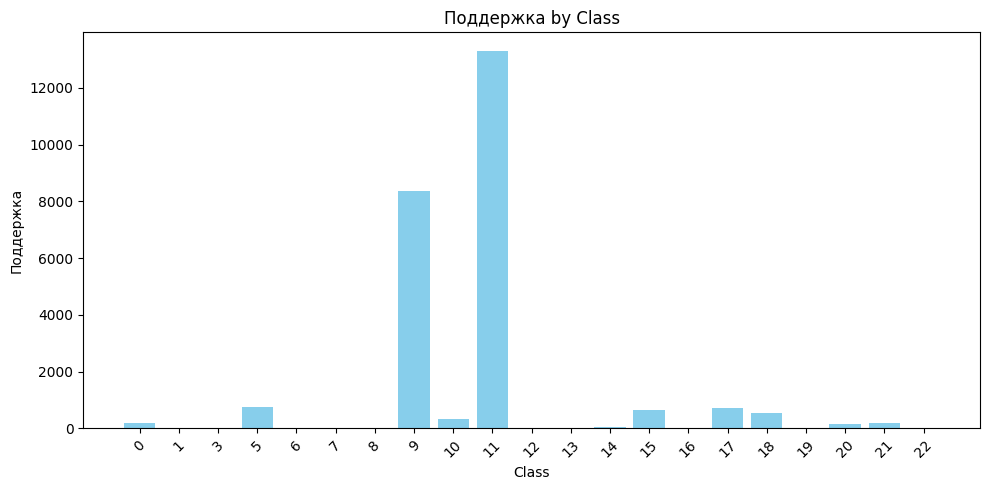

In [115]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Получение отчета классификации
report = classification_report(y_test, predictions)

# Печать отчета классификации
print(report)

# Разделение отчета классификации по строкам
report_data = report.split('\n')

# Извлечение метрик и значений из отчета классификации
labels = []
metrics = []
for row in report_data[2:-3]:  # Пропускаем заголовки и последние строки
    row_data = row.split()
    if len(row_data) == 5:  # Проверяем, достаточно ли элементов в строке
        label = row_data[0]
        precision = float(row_data[1])
        recall = float(row_data[2])
        f1 = float(row_data[3])
        support = float(row_data[4])
        labels.append(label)
        metrics.append({'Точность': precision, 'Полнота': recall, 'F1-метрика': f1, 'Поддержка': support})

# Построение графиков для каждой метрики
for metric in ['Точность', 'Полнота', 'F1-метрика', 'Поддержка']:
    values = [m[metric] for m in metrics]
    plt.figure(figsize=(10, 5))
    plt.bar(labels, values, color='skyblue')
    plt.xlabel('Class')
    plt.ylabel(metric)
    plt.title(f'{metric} by Class')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


##Здесь модель №2 полносвязная НС с обработанными параметрами

##Здесь будет код который требует проверки и экспериментов + таблицы и датаграммы для сравнения точности

Ниже модель классификации CART, это древовидный метод классификации или регресии. Данный код выполняет предсказание меток классов. Из минусов: не может

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
# Загрузка набора данных Iris

y= df[['attack']]
X = df.drop(labels=['attack'], axis=1)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели дерева решений (CART)
model = DecisionTreeClassifier()

# Обучение модели на обучающем наборе данных
model.fit(X_train, y_train)

# Предсказание меток классов для тестового набора данных
y_pred = model.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9969438380631077


SyntaxError: invalid syntax (<ipython-input-89-efb1a9b93a17>, line 1)

##Здесь другая модель

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import numpy as np

# Задаем параметры итеративной кластеризации
chunk_size = 10000  # Размер части данных для обработки
total_samples = len(df)  # Общее количество образцов в датасете
n_clusters = 3  # Число кластеров

# Инициализируем пустую матрицу связности
Z = None

# Итерируемся по частям данных и обновляем модель
for i in range(0, total_samples, chunk_size):
    chunk = df.iloc[i:i+chunk_size]  # Выбираем очередную часть данных
    X = chunk[['protocol_type', 'service', 'flag', 'attack']]  # Выбираем признаки для кластеризации

    # Создаем и обучаем модель случайного леса
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X, np.arange(len(X)))  # Используем произвольные метки для обучения

    # Применяем модель для предсказания кластеров на тех же данных
    clusters = model.predict(X)

    # Обновляем матрицу связности
    if Z is None:
        Z = linkage(X, method='ward')
    else:
        Z_chunk = linkage(X, method='ward ')
        Z = np.concatenate((Z, Z_chunk), axis=0)

# Визуализация дендрограммы
plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram")
dendrogram = dendrogram(Z)
plt.ylabel('Euclidean distances')
plt.show()


ValueError: Invalid method: ward 